In [109]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from random import shuffle
import progressbar
import cv2

def load_data():
    train = np.load('./data4.npy')
    return train

In [110]:
def get_predictions_gmm(x, mu, cov, pi, prior):
    sum_g = 0
    l = len(cov)
    g = x-mu[0]
    for i in range(l):
        I = np.identity(cov[i].shape[0], dtype=float)
        p = 1e-2
        I = p*I
        cov[i]+=I
        sum_g+=(pi[i]*(np.linalg.det(cov[i])**-.5)*((2 * np.pi)**(-x.shape[0]/2.))* np.exp(-.5 * np.matmul((x - mu[i]),np.matmul(np.linalg.inv(cov[i]),(x- mu[i]).T).T)))
    return sum_g*prior

In [111]:
def gaussian_normal(x, mu, cov):
    I = np.identity(cov.shape[0], dtype=float)
    p = 1e-2
    I = p*I
    cov+=I
    inv_cov = np.linalg.inv(cov)
    g = (np.linalg.det(cov)**-.5)*((2 * np.pi)**(-x.shape[1]/2.))* np.exp(-.5 * np.einsum('ij, ij -> i',x - mu,np.dot(np.linalg.inv(cov),(x- mu).T).T)) 
    return g

def gmm(cluster, pts, k, dims):
    mu = []                    #mean of each cluster
    cov = []                   #covaraince matrix for each cluster
    pi =  []                   #mixture coefficients for each clusters
    n = len(pts)               #total number of points in the given class
    gamma = np.ndarray(shape=(n,k),dtype=float)
    for i in range(k):
        pi.append(cluster[i].shape[0]/n)
        mean = np.mean(cluster[i], axis=0)
        mu.append(mean)
        covariance = np.cov(cluster[i].T)
        cov.append(covariance)
    
    print('Initialization Done')
    likelihood = []
    for t in range(100):
        for j in range(k):
            gamma[:,j] = pi[j]*gaussian_normal(pts,mu[j],cov[j])
        li = np.sum(np.log(np.sum(gamma, axis = 1)))
        
        likelihood.append(li)
        gamma = (gamma.T / np.sum(gamma, axis = 1)).T
        n_eff = np.sum(gamma, axis = 0)
        for i in range(k):
            mu[i] = (1/n_eff[i])*np.sum(gamma[:, i] * pts.T, axis = 1).T
            x_mu = np.matrix(pts - mu[i])
            cov[i] = np.array(1/n_eff[i])*np.dot(np.multiply(x_mu.T,  gamma[:, i]), x_mu)
            pi[i] = n_eff[i]/n
    
    plt.plot(likelihood)
    plt.title('Log-Likelihood vs Iteration plot')
    plt.xlabel('Iterations')
    plt.ylabel('log-likelihood')
    plt.show()

    return mu, cov, pi, gamma

In [112]:
def kmeans(data,k, dim):
    
    l = data.shape[0]
    lis = []
    for i in range(l):
        lis.append(data[i,:])
    
    shuffle(lis)
    cluster = []
    mean = []
    for i in range(k):
        mean.append(lis[i])
            
    
    for i in progressbar.progressbar(range(100)):
        cluster[:]=[]
        
        distance=[]
        clust=[]
        for j in range(l):
            distance.append(1e15)
            clust.append(-1)
        for j in range(k):
            temp=[]
            cluster.append(temp)
        for j in range(k):
            dis = np.linalg.norm(data-mean[j], axis=1)
            for p in range(l):
                if(dis[p]<distance[p]):
                    distance[p]=dis[p]
                    clust[p] = j
                    
        for j in range(l):
            cluster[clust[j]].append(data[j])
            
        for j in range(k):
            mean[j]=np.mean(cluster[j], axis=0)
            
    for i in progressbar.progressbar(range(k)):
        cluster[i]=np.array(cluster[i])
        
    return mean, cluster


In [126]:
def get_image(mean, img):
    new_img = np.ndarray(shape=(img.shape[0],img.shape[1],3),dtype=float)
    color = {0:[255,0,0],1:[0,255,0],2:[0,0,255]}
    for i in progressbar.progressbar(range(0,img.shape[0]-2)):
        for j in range(0,img.shape[1]-2):
            data = []
            temp = img[i:i+2,j:j+2]
            lis = np.reshape(temp,(4,1))
            g = np.var(lis.T)
            data.append([np.mean(lis), np.asscalar(g)])
            l = []
            x = np.array(data)
            for k in range(3):
                mu = mean[k]
                mu = np.array(mu)
                l.append(np.linalg.norm(x-mu))
                
                
            ind = np.argmin(l)
            new_img[i][j][0]=color[ind][0]
            new_img[i][j][1]=color[ind][1]
            new_img[i][j][2]=color[ind][2]
    
    return new_img    

N/A% (0 of 516) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

(443760, 2)
[[  197.4962179    403.17779127]
 [  220.04737355    12.94437693]
 [  148.05011686  1308.77199976]]
60.png


100% (516 of 516) |######################| Elapsed Time: 0:02:53 Time:  0:02:53
N/A% (0 of 516) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

50.png


100% (516 of 516) |######################| Elapsed Time: 0:01:53 Time:  0:01:53
N/A% (0 of 516) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

55.png


100% (516 of 516) |######################| Elapsed Time: 0:00:57 Time:  0:00:57


Initialization Done


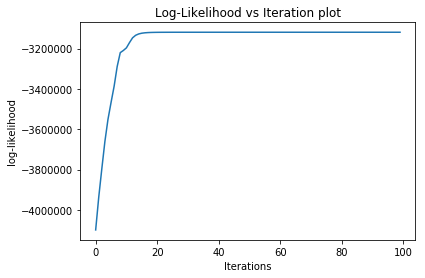

  0% (1 of 516) |                        | Elapsed Time: 0:00:00 ETA:   0:01:16

60.png


100% (516 of 516) |######################| Elapsed Time: 0:00:52 Time:  0:00:52
  0% (1 of 516) |                        | Elapsed Time: 0:00:00 ETA:   0:01:01

50.png


  5% (26 of 516) |#                      | Elapsed Time: 0:00:02 ETA:   0:00:52

In [ ]:
def main():
    train = load_data()
    print(train.shape)
#     mean, cluster = kmeans(train, 3, 2)
    path_test = './dataset4/Test'
#     mean = np.array(mean)
#     cluster = np.array(cluster)
#     np.save('mean_seg_km.npy',mean)
#     np.save('cluster_seg_km.npy',cluster)
    
    
    mean = np.load('mean_seg_km.npy')
    cluster = np.load('cluster_seg_km.npy')
    print(mean)
    for im in os.listdir(path_test):
        print(im)
        img = cv2.imread(os.path.join(path_test,im),0)
        padx = (7-(img.shape[0]%7))%7
        pady = (7-(img.shape[1]%7))%7
        img = cv2.resize(img,(img.shape[1]+pady, img.shape[0]+padx))
        new_img = get_image(mean, img)
        cv2.imwrite(im+'_seg_kmean.png',new_img)
        
        
    mu, cov, pi, gamma = gmm(cluster, train, 3, 2)
    for im in os.listdir(path_test):
        print(im)
        img = cv2.imread(os.path.join(path_test,im),0)
        padx = (7-(img.shape[0]%7))%7
        pady = (7-(img.shape[1]%7))%7
        img = cv2.resize(img,(img.shape[1]+pady, img.shape[0]+padx))
        new_img = get_image(mu, img)
        cv2.imwrite(im+'_seg_gmm.png',new_img)

        
if __name__=="__main__":
    main()     
        

In [ ]:
data = np.load('data4_1.npy')
